In [6]:
import pandas as pd
from random import seed
from random import randrange
from math import exp
from math import floor
import numpy as np

In [ ]:
#split data into train and test
def cross_val_split(data_X,data_Y,test_size,seed_val):
	data_x = data_X.tolist()
	data_y = data_Y.tolist()
	seed(seed_val)
	train_size = floor((1 - test_size)*len(data_x))
	train_x = []
	train_y = []
	while(len(train_x)<train_size):
		index = randrange(len(data_x))
		train_x.append(data_x.pop(index))
		train_y.append(data_y.pop(index))
	return train_x,train_y,data_x,data_y

#columnwise max-min statistics for scaling
def statistics(x):
	cols = list(zip(*x))
	stats = []
	for e in cols:
		stats.append([min(e),max(e)])
	return stats

#scale the features
def scale(x, stat):
	for row in x:
		for i in range(len(row)):
			row[i] = (row[i] - stat[i][0])/(stat[i][1] - stat[i][0])
  
#convert different classes into different columns to implement one v/s all
def one_vs_all_cols(s):
	m = list(set(s))
	m.sort()
	for i in range(len(s)):
		new = [0]*len(m)
		new[m.index(s[i])] = 1
		s[i] = new
	return m

#Theta transpose x Feature Vector
def ThetaTX(Q,X):
	det = 0.0
	for i in range(len(Q)):
		det += X[i]*Q[i]
	return det

#cost for negative class (classs = 0)
def LinearSVM_cost0(z):
	if(z < -1): #Ensuring margin
		return 0
	return z + 1

#cost for positive class (classs = 1)
def LinearSVM_cost1(z):
	if(z > 1): #Ensuring margin
		return 0
	return -z + 1

def sigmoid(z):
	return 1.0/(1.0 + exp(-z))

#SVM cost
def cost(theta,c,x,y):
	cost = 0.0
	for i in range(len(x)):
		z = ThetaTX(theta[c], x[i])
		cost += y[i]*LinearSVM_cost1(z) + (1 - y[i])*LinearSVM_cost0(z)
	return cost

#Gradient Descent on the weights/parameters
def gradDescent(theta, c, x, y, learning_rate):
	oldTheta = theta[c]
	for Q in range(len(theta[c])):
		derivative_sum = 0 
		for i in range(len(x)):
			derivative_sum += (sigmoid(ThetaTX(oldTheta, x[i])) - y[i])*x[i][Q]
		theta[c][Q] -= learning_rate*derivative_sum

#predictions using trained weights
def predict(data, theta):
	predictions = []
	count = 1
	for row in data:
		hypothesis = []
		multiclass_ans = [0]*len(theta)
		for c in range(len(theta)):
			z = ThetaTX(row,theta[c])
			hypothesis.append(sigmoid(z))
		index = hypothesis.index(max(hypothesis))
		multiclass_ans[index] = 1
		predictions.append(multiclass_ans)
		count+=1
	return predictions

def accuracy(predicted, actual):
	n = len(predicted)
	correct = 0
	for i in range(n):
		if(predicted[i]==actual[i]):
			correct+=1
	return correct/n

def cross_validation(x, y, test_data_size, validations, learning_rate, epoch):
	print("Epochs count: ",epoch)
	accuracies = []
	for valid in range(validations):
		x_train, y_train, x_test, y_test = cross_val_split(x,y,
                                                     test_data_size,valid+1)
		#converting y_train to classwise columns with 0/1 values
		classes = []
		for i in range(len(label_map)):
			classes.append([row[i] for row in y_train])
		#Initialising Theta (Weights)
		theta = [[0]*len(x_train[0]) for _ in range(len(classes))]
		#training model
		for i in range(epoch):
			for class_type in range(len(classes)):
				gradDescent(theta,class_type,x_train,classes[class_type],learning_rate)
		#Predicting using test data
		y_pred = predict(x_test, theta)
		#Calculating accuracy
		accuracies.append(accuracy(y_pred,y_test))
		print("Validation", valid+1, "accuracy: ", accuracies[valid])
	return sum(accuracies)/len(accuracies), y_pred

In [3]:
dataset = pd.read_csv("data.csv")
data = dataset.values

x = data[:, 2:-1]
y = data[:, 1]
print(y[:10], x[:2])

stats = statistics(x)
scale(x,stats)
label_map = one_vs_all_cols(y)
print(label_map)

['M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M'] [[17.99 10.38 122.8 1001.0 0.1184 0.2776 0.3001 0.1471 0.2419 0.07871
  1.095 0.9053 8.589 153.4 0.006399 0.04904 0.05373 0.01587 0.03003
  0.006193 25.38 17.33 184.6 2019.0 0.1622 0.6656 0.7119 0.2654 0.4601
  0.1189]
 [20.57 17.77 132.9 1326.0 0.08474 0.07864 0.0869 0.07017 0.1812 0.05667
  0.5435 0.7339 3.398 74.08 0.005225 0.01308 0.0186 0.0134 0.01389
  0.003532 24.99 23.41 158.8 1956.0 0.1238 0.1866 0.2416 0.186 0.275
  0.08902]]


NameError: name 'statistics' is not defined

In [33]:
# split data into train and test
from sklearn.model_selection import train_test_split


def cross_val_split(data_X, data_Y, test_size, seed_val):
    data_x = data_X.tolist()
    data_y = data_Y.tolist()
    seed(seed_val)
    train_size = floor((1 - test_size)*len(data_x))
    train_x = []
    train_y = []
    while(len(train_x) < train_size):
        index = randrange(len(data_x))
        train_x.append(data_x.pop(index))
        train_y.append(data_y.pop(index))
    return train_x, train_y, data_x, data_y

# columnwise max-min statistics for scaling


def statistics(x):
    cols = list(zip(*x))
    stats = []
    for e in cols:
        stats.append([min(e), max(e)])
    return stats

# scale the features


def scale(x, stat):
    for row in x:
        for i in range(len(row)):
            row[i] = (row[i] - stat[i][0])/(stat[i][1] - stat[i][0])

# convert different classes into different columns to implement one v/s all


def one_vs_all_cols(s):
    res = []
    m = list(set(s))
    m.sort()
    for i in range(len(s)):
        new = [0]*len(m)
        new[m.index(s[i])] = 1
        res.append(new)
    return m, np.array(res)

# Theta transpose x Feature Vector


def ThetaTX(Q, X):
    det = 0.0
    for i in range(len(Q)):
        det += X[i]*Q[i]
    return det


def sigmoid(z):
    return 1.0/(1.0 + exp(-z))

# Gradient Descent on the weights/parameters


def gradDescent(theta, c, x, y, learning_rate):
    oldTheta = theta[c]
    for Q in range(len(theta[c])):
        derivative_sum = 0
        for i in range(len(x)):
            derivative_sum += (sigmoid(ThetaTX(oldTheta, x[i])) - y[i])*x[i][Q]
        theta[c][Q] -= learning_rate*derivative_sum

# predictions using trained weights


def predict(data, theta):
    predictions = []
    count = 1
    for row in data:
        hypothesis = []
        multiclass_ans = [0]*len(theta)
        for c in range(len(theta)):
            z = ThetaTX(row, theta[c])
            hypothesis.append(sigmoid(z))
        index = hypothesis.index(max(hypothesis))
        multiclass_ans[index] = 1
        predictions.append(multiclass_ans)
        count += 1
    return predictions


def accuracy(predicted, actual):
    n = len(predicted)
    p = np.array(predicted)
    a = np.array(actual)
    correct = np.count_nonzero(p == a)
    return (correct - n*(a.shape[1]-2)) / (2 * n)


def cross_validation(x, y, x_res, y_res, test_data_size, validations, learning_rate, epoch):
    print("Epochs count: ", epoch)
    accuracies = []
    # Initialising Theta (Weights)
    theta = [[0]*len(x[0]) for _ in range(len(label_map))]
    for valid in range(validations):
        x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                          test_size=test_data_size, random_state=42)
        # converting y_train to classwise columns with 0/1 values
        classes = []
        for i in range(len(label_map)):
            classes.append([row[i] for row in y_train])
        # training model
        for i in range(epoch):
            print('.', end='')
            for class_type in range(len(classes)):
                print(',', end='')
                gradDescent(theta, class_type, x_train,
                            classes[class_type], learning_rate)
        # Predicting using validation data
        y_pred = predict(x_val, theta)
        # Calculating accuracy
        accuracies.append(accuracy(y_pred, y_val))
        print("\nValidation", valid+1, "accuracy: ", accuracies[valid])
        y_pred = predict(x_res, theta)
        print("Test data accuracy: ", accuracy(y_pred, y_res))

    return sum(accuracies)/len(accuracies), y_pred


dataset = pd.read_csv("data.csv")
data = dataset.values

X = data[:, 2:-1]
y = data[:, 1]

#print(y[:10], X[:2])

stats = statistics(X)
scale(X, stats)
label_map, y = one_vs_all_cols(y)
# print(label_map)
#print(y[:2], X[:2])

# Splitting dataset into training and testing data
test_data_size = 0.2
learning_rate = 0.02
epoch = 50
validations = 5

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
final_score, y_pred = cross_validation(X_train, y_train, X_test, y_test, test_data_size, validations,
                                       learning_rate, epoch)


Epochs count:  50
.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,
Validation 1 accuracy:  0.8681318681318682
Test data accuracy:  0.868421052631579
.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,
Validation 2 accuracy:  0.8901098901098901
Test data accuracy:  0.8771929824561403
.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,
Validation 3 accuracy:  0.9010989010989011
Test data accuracy:  0.8771929824561403
.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,
Validation 4 accuracy:  0.8901098901098901
Test data accuracy:  0.8859649122807017
.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,,.,

In [ ]:
#Splitting dataset into training and testing data
test_data_size = 0.2
learning_rate = 0.02
epoch = 100
validations = 5

final_score,y_pred = cross_validation(x,y,test_data_size,validations,
                                      learning_rate,epoch)

Epochs count:  100
Validation 1 accuracy:  0.9385964912280702
Validation 2 accuracy:  0.956140350877193
Validation 3 accuracy:  0.9298245614035088
Validation 4 accuracy:  0.9385964912280702
Validation 5 accuracy:  0.9473684210526315


In [ ]:
#Printing Final Stats
print("Learning rate: ", learning_rate)
print("Iterations: ",epoch)
print("Training data size: ", floor(len(x)*(1 - test_data_size)))
print("Test data size: ", len(x) - floor(len(x)*(1 - test_data_size)))
print("Accuracy: ",final_score*100,"%")

Learning rate:  0.02
Iterations:  50
Training data size:  456
Test data size:  114
Accuracy:  90.86956521739131 %




---

---



---

---









In [ ]:
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("data.csv")
data = dataset.values

#Assigning x and y - features and classes
x = data[:,2:-1]
y = data[:,1]
print(y[:10], x[:2])
X_train, X_validation, Y_train, Y_validation = \
                                train_test_split(x, y,
                                          test_size=0.2, random_state=42)

['M' 'buf' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'] [[17.99 10.38 122.8 1001.0 0.1184 0.2776 0.3001 0.1471 0.2419 0.07871
  1.095 0.9053 8.589 153.4 0.006399 0.04904 0.05372999999999999 0.01587
  0.03003 0.006193 25.38 17.33 184.6 2019.0 0.1622 0.6656 0.7119 0.2654
  0.4601 0.1189]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]]


In [ ]:
dataset.loc[6]
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,0.0
mean,3.031855e+07,14.102507,19.255807,91.807684,653.740175,0.096191,0.104158,0.088644,0.048833,0.180844,0.062687,0.404461,1.214719,2.861031,40.266312,0.007029,0.025433,0.031838,0.011775,0.020506,0.003788,16.240647,25.632175,107.073035,879.038246,0.132136,0.253819,0.271711,0.114405,0.289567,0.083799,NaN
std,1.249172e+08,3.570327,4.372549,24.581333,352.673112,0.014620,0.052947,0.079737,0.038823,0.028422,0.007529,0.277588,0.553515,2.023641,45.482405,0.003014,0.017924,0.030189,0.006185,0.008304,0.002649,4.876836,6.234324,33.872269,570.050935,0.023476,0.157559,0.208752,0.065850,0.062996,0.018385,NaN
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,8.691325e+05,11.692500,16.170000,75.065000,419.925000,0.086130,0.064605,0.029500,0.020310,0.161900,0.057693,0.232325,0.831650,1.603000,17.850000,0.005161,0.012982,0.015008,0.007627,0.015063,0.002237,13.010000,21.065000,84.087500,514.325000,0.116600,0.146300,0.114425,0.064330,0.250250,0.071318,NaN
50%,9.060010e+05,13.355000,18.835000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,0.323950,1.108000,2.285500,24.485000,0.006374,0.020435,0.025875,0.010920,0.018725,0.003162,14.965000,25.405000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015,NaN
75%,8.813066e+06,15.780000,21.795000,104.025000,782.675000,0.105300,0.130400,0.130350,0.073910,0.195675,0.066120,0.478375,1.473750,3.350250,45.132500,0.008140,0.032372,0.041955,0.014710,0.023453,0.004547,18.782500,29.705000,125.325000,1080.500000,0.146000,0.338600,0.382400,0.161375,0.317825,0.092075,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


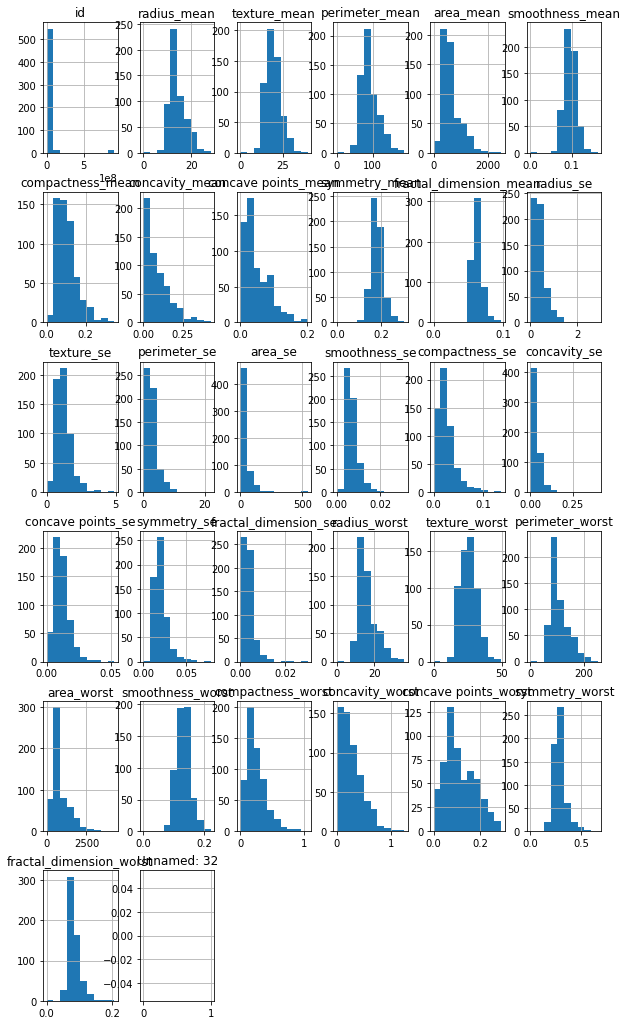

In [ ]:
import matplotlib.pyplot as plt
dataset.hist(figsize = (10, 18))
plt.show()

In [ ]:
import seaborn as sns
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(18,10)) 
sns.heatmap(corr,annot=True)
corr

In [ ]:
import numpy as np
data = dataset.values
#Assigning x and y - features and classes
X = data[:,2:-1]
y = data[:,1]

In [ ]:
def setValues(size):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)

  print('X_train shape: ', X_train.shape)
  print('y_train shape: ', y_train.shape)
  print('X_test shape: ', X_test.shape)
  print('y_test shape: ', y_test.shape)

  return  X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = setValues(0.2)

X_train shape:  (456, 30)
y_train shape:  (456,)
X_test shape:  (114, 30)
y_test shape:  (114,)


In [ ]:
from sklearn import model_selection
from sklearn.svm import SVC
model = SVC(kernel='linear')

kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold,
                                             scoring='accuracy')
msg = "%s: %f (%f)" % ('SVM', cv_results.mean(), cv_results.std())
print(msg)

SVM: 0.938557 (0.024739)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.9912280701754386
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        76
           M       1.00      0.97      0.99        38

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

[[76  0]
 [ 1 37]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


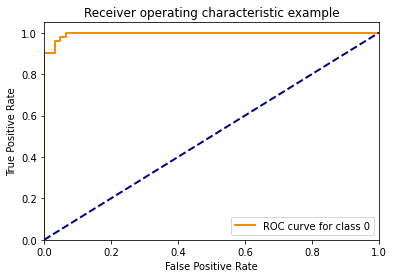

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
dataset = pd.read_csv("data.csv")
data = dataset.values

#Assigning x and y - features and classes
X = data[:,2:-1]
y = data[:,1]

# Binarize the output
y = label_binarize(y, classes=['M', 'B', 'buf'])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
ind = 0
plt.plot(fpr[ind], tpr[ind], color='darkorange',
         lw=lw, label='ROC curve for class 0')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


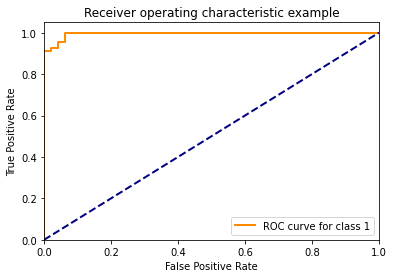

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
dataset = pd.read_csv("data.csv")
data = dataset.values

#Assigning x and y - features and classes
X = data[:,2:-1]
y = data[:,1]

# Binarize the output
y = label_binarize(y, classes=['M', 'B', 'buf'])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
ind = 1
plt.plot(fpr[ind], tpr[ind], color='darkorange',
         lw=lw, label='ROC curve for class 1')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

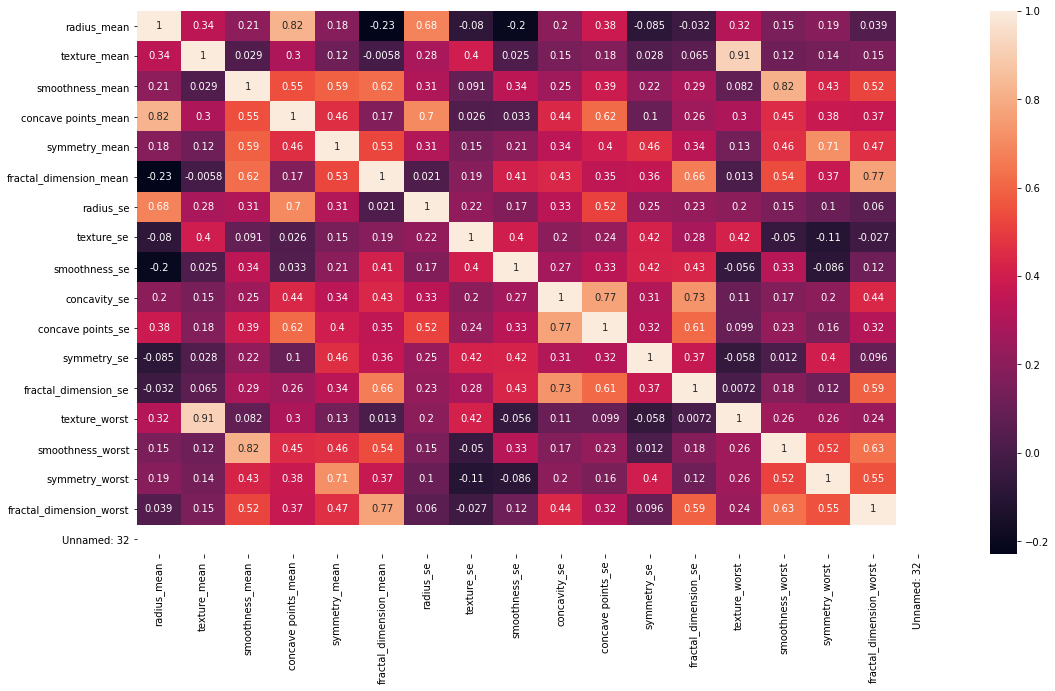

In [ ]:
dataset_ = dataset.drop(['id', 'area_mean', 'concavity_mean', 'area_se',
                         'area_worst', 'perimeter_mean', 'perimeter_worst',
                         'radius_worst', 'perimeter_se', 'concavity_worst',
                         'compactness_se', 'compactness_worst',
                         'compactness_mean', 'concave points_worst'], axis=1)
data = dataset_.values
corr = dataset_.corr()
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corr,annot=True)

In [ ]:
data[:5]

array([['M', 17.99, 10.38, 0.1184, 0.1471, 0.2419, 0.07871, 1.095,
        0.9053, 0.006399, 0.05372999999999999, 0.01587, 0.03003,
        0.006193, 17.33, 0.1622, 0.4601, 0.1189, nan],
       ['buf', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan],
       ['M', 20.57, 17.77, 0.08474, 0.07017000000000001, 0.1812,
        0.056670000000000005, 0.5435, 0.7339, 0.005225, 0.0186, 0.0134,
        0.013890000000000001, 0.003532, 23.41, 0.1238, 0.275, 0.08902,
        nan],
       ['M', 19.69, 21.25, 0.1096, 0.1279, 0.2069, 0.059989999999999995,
        0.7456, 0.7869, 0.00615, 0.03832, 0.02058, 0.0225, 0.004571,
        25.53, 0.1444, 0.3613, 0.08757999999999999, nan],
       ['M', 11.42, 20.38, 0.1425, 0.1052, 0.2597, 0.09744, 0.4956,
        1.156, 0.00911, 0.05661, 0.01867, 0.059629999999999996, 0.009208,
        26.5, 0.2098, 0.6638, 0.17300000000000001, nan]], dtype=object)

In [ ]:

X = data[:,1:-1]
y = data[:,0]
X_train, X_test, y_train, y_test = setValues(0.2)
model = SVC(kernel='linear')

kfold = model_selection.KFold(n_splits=10, random_state = seed)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold,
                                             scoring='accuracy')
msg = "%s: %f (%f)" % ('SVM', cv_results.mean(), cv_results.std())
print(msg)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

X_train shape:  (456, 17)
y_train shape:  (456,)
X_test shape:  (114, 17)
y_test shape:  (114,)
SVM: 0.945072 (0.044380)
0.9385964912280702
              precision    recall  f1-score   support

           B       0.93      0.97      0.95        71
           M       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

[[69  2]
 [ 5 38]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
